<a href="https://colab.research.google.com/github/Aagam1005/Machine-Learning/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation using K-Means Clustering
Loading customer dataset...
Dataset loaded successfully!
Dataset shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Dataset Overview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1  Female   43                  57                      60
1           2  Female   36                  70                      46
2           3  Female   45                  77                      71
3           4  Female   56                  50                      38
4           5    Male   35                  66                      19
5           6    Male   35                  60                      32
6           7  Female   56                  62                      20
7           8  Female   47                  41                      36
8           9  Female   32                  61                      48
9          10  Female   44                  72        

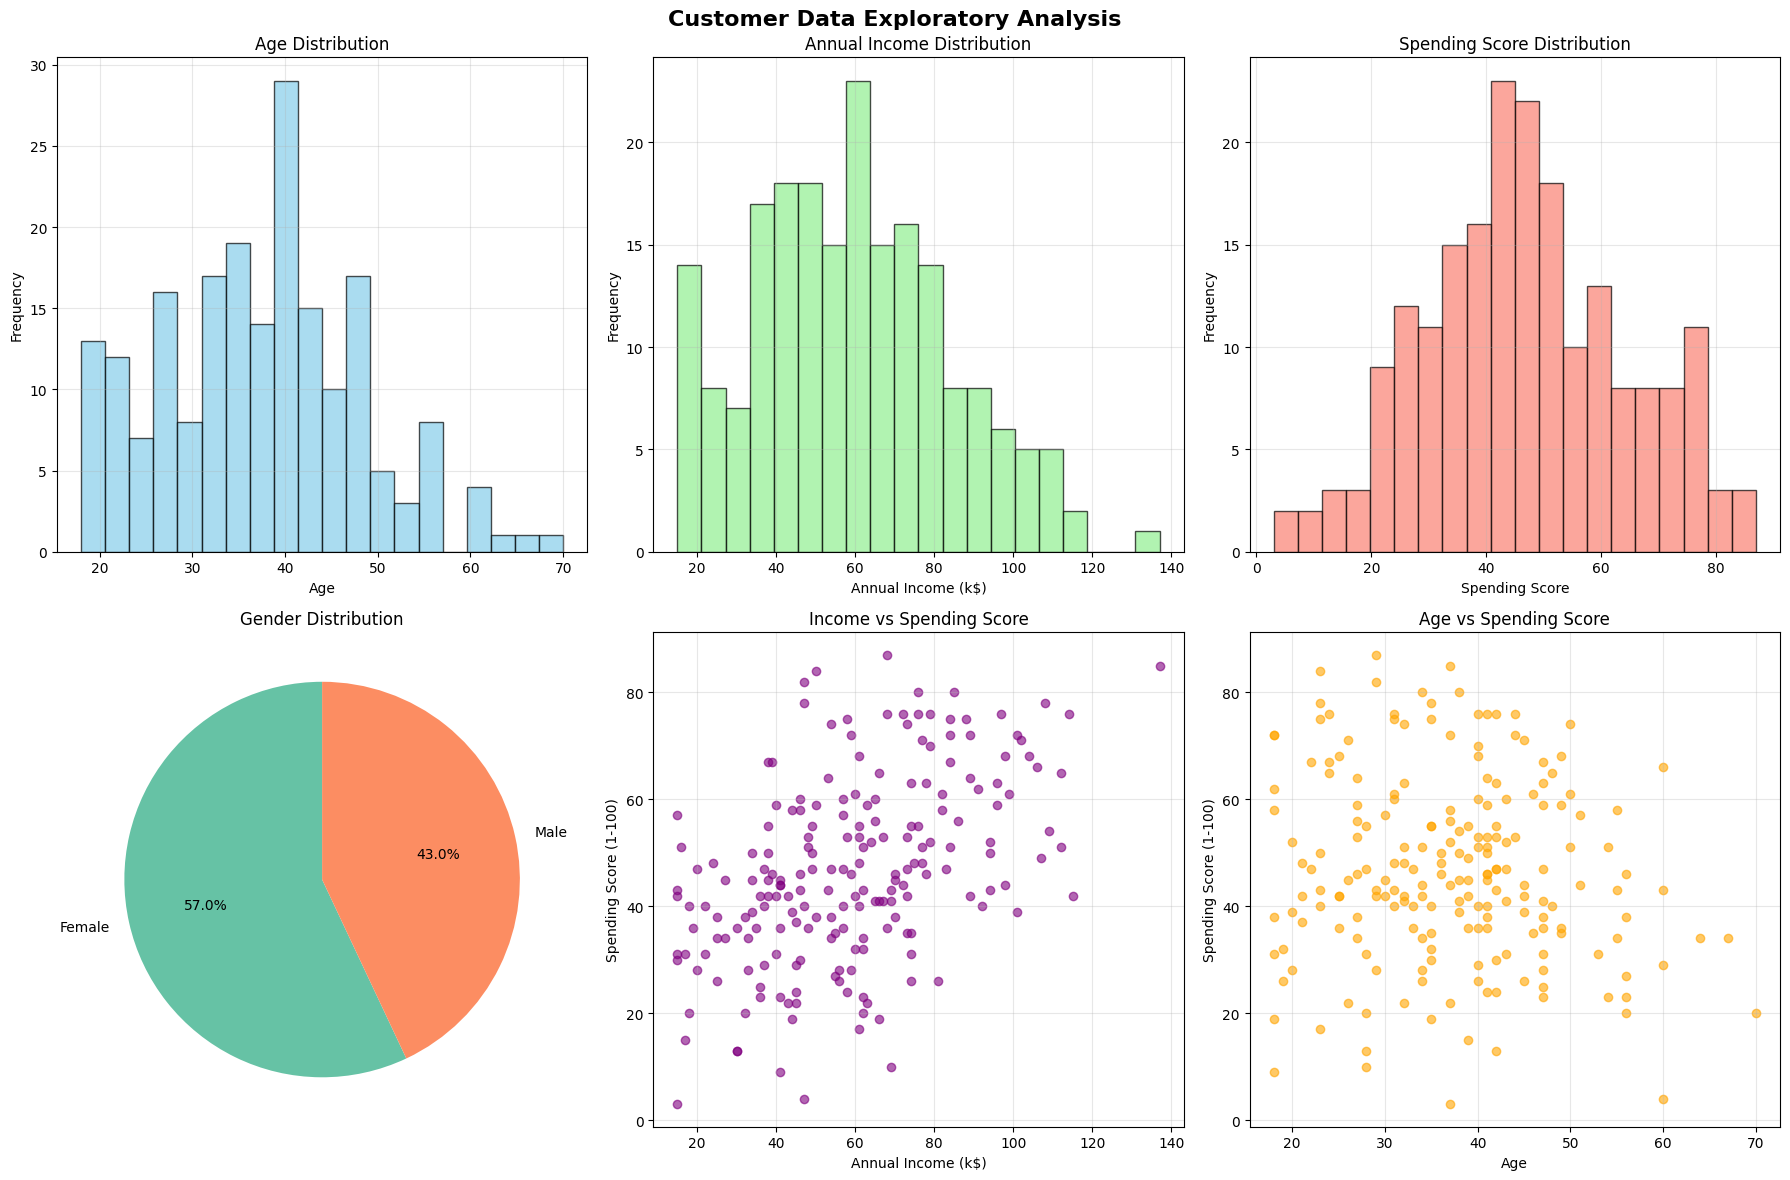


Preparing Data for K-Means Clustering
Selected features for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Feature matrix shape: (200, 3)

Feature Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.075536               -0.123786
Annual Income (k$)     -0.075536            1.000000                0.482222
Spending Score (1-100) -0.123786            0.482222                1.000000


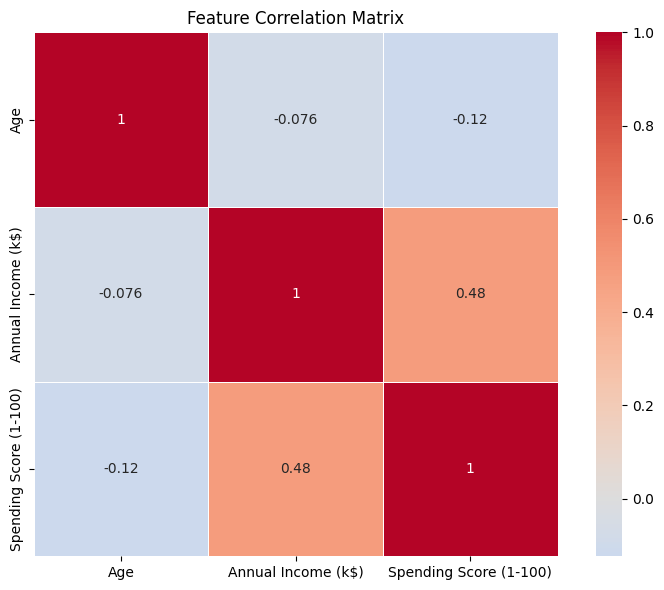


Standardizing features...
Features standardized successfully!
Scaled feature matrix shape: (200, 3)

Finding Optimal Number of Clusters
Calculating WCSS and Silhouette Scores...
k=1: WCSS=600.00
k=2: WCSS=393.71, Silhouette Score=0.296
k=3: WCSS=299.33, Silhouette Score=0.285
k=4: WCSS=252.59, Silhouette Score=0.250
k=5: WCSS=222.70, Silhouette Score=0.258
k=6: WCSS=197.94, Silhouette Score=0.265
k=7: WCSS=179.08, Silhouette Score=0.245
k=8: WCSS=160.11, Silhouette Score=0.260
k=9: WCSS=145.17, Silhouette Score=0.255
k=10: WCSS=131.95, Silhouette Score=0.277


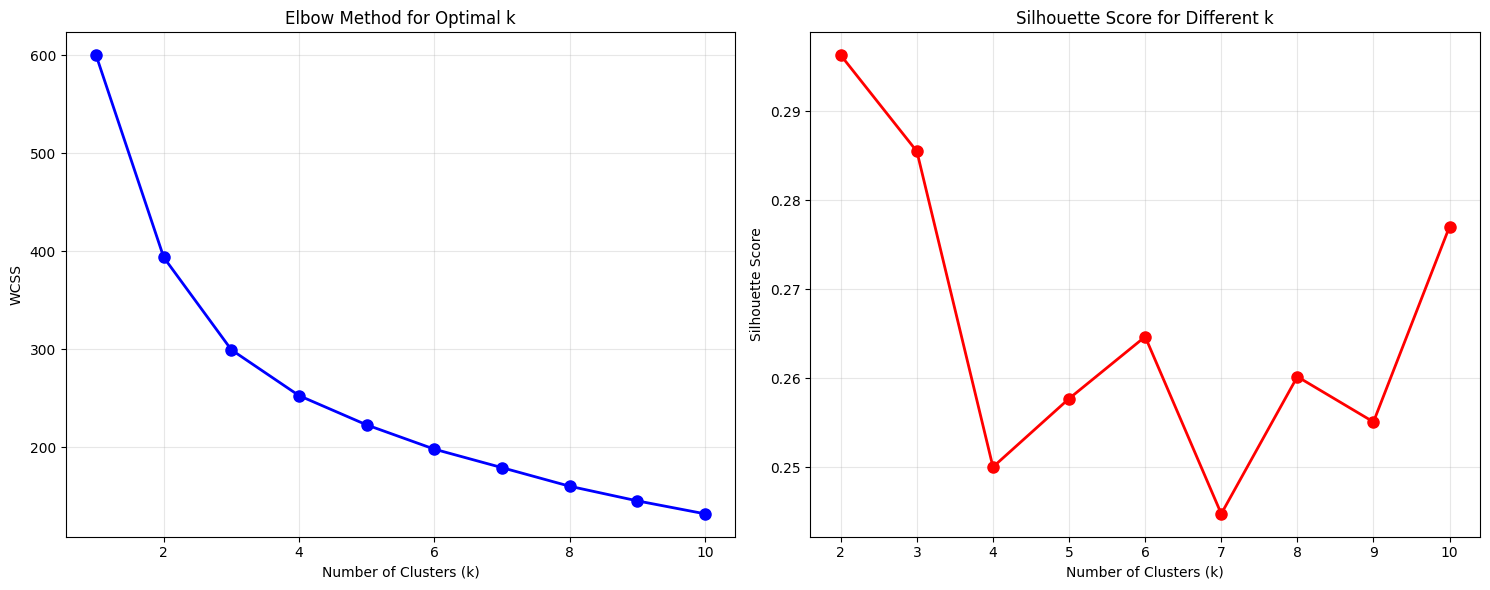


Optimal number of clusters based on Silhouette Score: 2
Best Silhouette Score: 0.296

Applying K-Means Clustering with k=2
Clustering completed successfully!
Cluster centers shape: (2, 3)

Cluster Analysis

Cluster 0 (n=82):
  Average Age: 35.3 years
  Average Income: $80.3k
  Average Spending Score: 61.5
  Gender Distribution: {'Female': 48, 'Male': 34}

Cluster 1 (n=118):
  Average Age: 38.5 years
  Average Income: $44.3k
  Average Spending Score: 36.4
  Gender Distribution: {'Female': 66, 'Male': 52}

Detailed Cluster Statistics:
         Age_Mean  Age_Std  Income_Mean  Income_Std  Spending_Mean  \
Cluster                                                              
0           35.30     9.46        80.32       18.62          61.48   
1           38.48    11.54        44.25       16.44          36.43   

         Spending_Std  Count  
Cluster                       
0               12.45     82  
1               12.44    118  

Visualizing Clusters


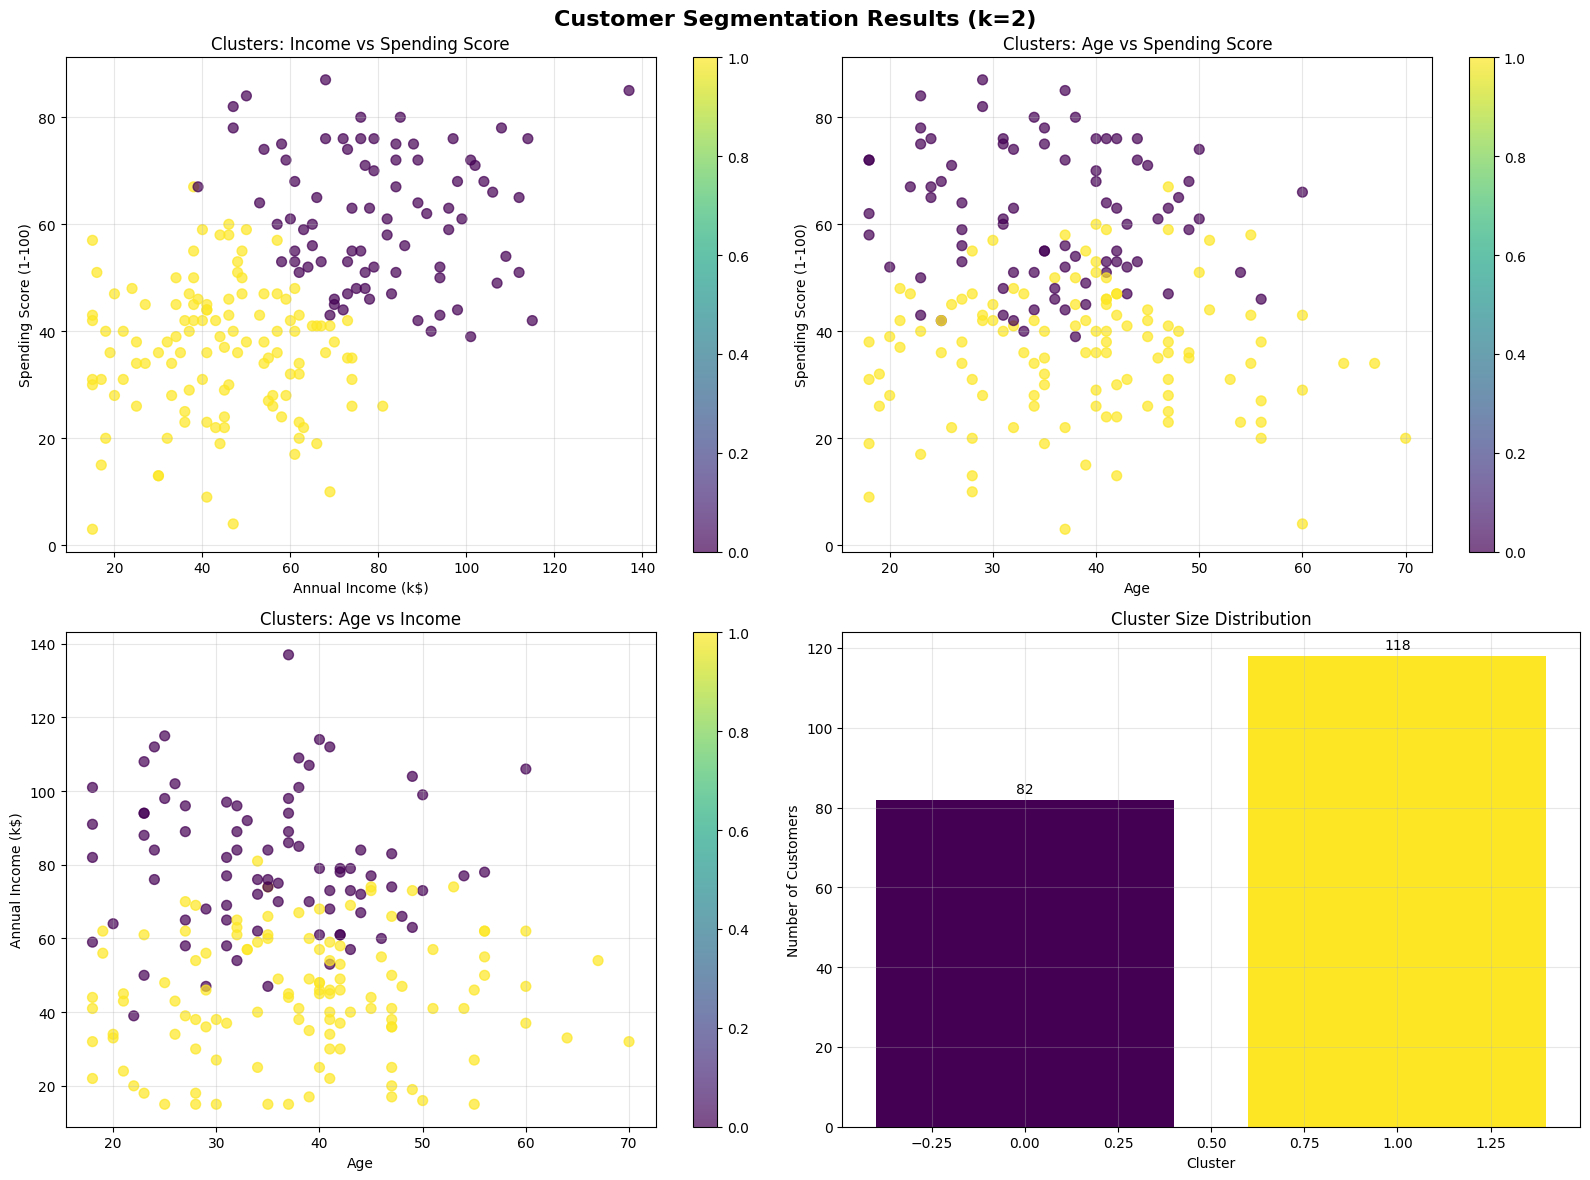

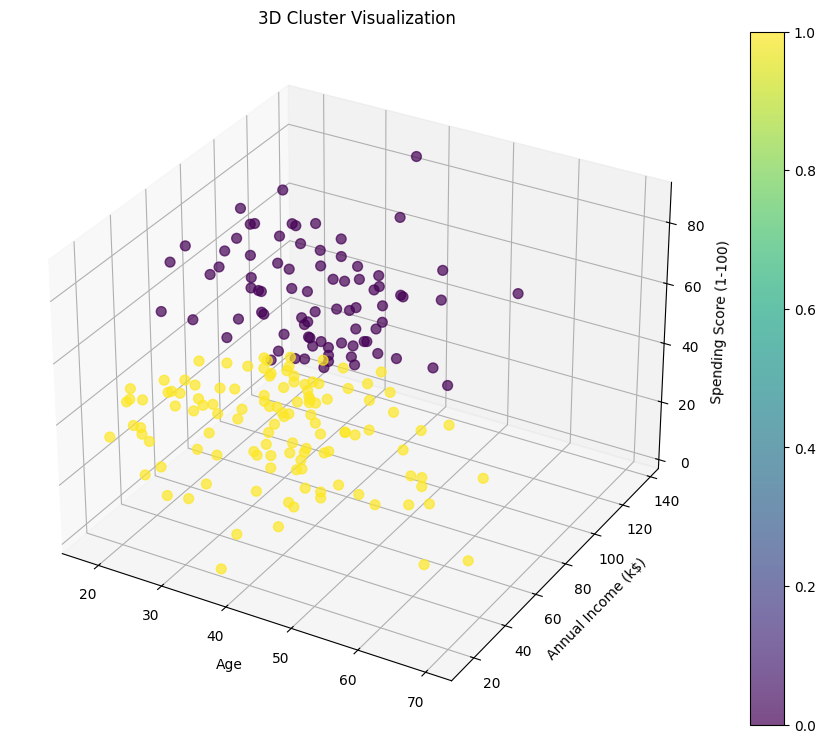


PCA Visualization


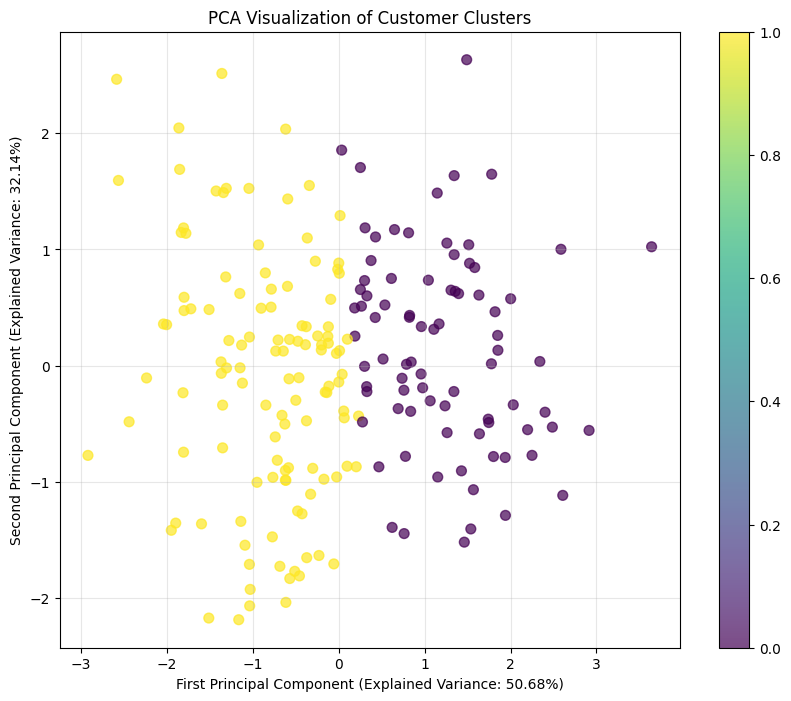

Total explained variance by 2 components: 82.82%

Customer Segment Interpretation

Cluster 0: High Income, High Spending
  Size: 82 customers (41.0%)
  Characteristics:
    - Average Age: 35.3 years
    - Average Income: $80.3k
    - Average Spending Score: 61.5

Cluster 1: Low Income, Low Spending
  Size: 118 customers (59.0%)
  Characteristics:
    - Average Age: 38.5 years
    - Average Income: $44.3k
    - Average Spending Score: 36.4

Business Recommendations

Cluster 0 - High Income, High Spending:
  - Target for premium products and services
  - Focus on luxury items and exclusive offers
  - Implement loyalty programs with high-value rewards

Cluster 1 - Low Income, Low Spending:
  - Most price-sensitive segment
  - Focus on basic products and competitive pricing
  - Implement cost-effective marketing strategies

Model Evaluation Metrics
Number of Clusters: 2
Silhouette Score: 0.296
Within-Cluster Sum of Squares: 393.71
Total Customers Segmented: 200

Saving Results
Results save

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("Set2")

print("Customer Segmentation using K-Means Clustering")
print("=" * 50)

# For Google Colab, you would typically upload the dataset
# Here's how to load the data (assuming you have the Mall_Customers.csv file)
print("Loading customer dataset...")

# Sample data creation for demonstration (replace with actual data loading)
# In Google Colab, you would use:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('Mall_Customers.csv')

# Creating sample data that mimics the actual Mall Customers dataset
np.random.seed(42)
n_customers = 200

# Generate synthetic customer data
customer_ids = range(1, n_customers + 1)
ages = np.random.normal(38, 12, n_customers).astype(int)
ages = np.clip(ages, 18, 70)  # Realistic age range

# Generate gender (1 for Male, 0 for Female)
genders = np.random.choice(['Male', 'Female'], n_customers, p=[0.44, 0.56])

# Generate annual income (in thousands)
annual_incomes = np.random.normal(60, 25, n_customers)
annual_incomes = np.clip(annual_incomes, 15, 140)

# Generate spending scores (1-100) with some correlation to income
base_spending = annual_incomes * 0.3 + np.random.normal(30, 15, n_customers)
spending_scores = np.clip(base_spending, 1, 100).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'Gender': genders,
    'Age': ages,
    'Annual Income (k$)': annual_incomes.round(0).astype(int),
    'Spending Score (1-100)': spending_scores
})

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic information
print("\nDataset Overview:")
print(df.head(10))

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values if missing_values.sum() > 0 else "No missing values found!")

# Exploratory Data Analysis
print("\nExploratory Data Analysis")
print("=" * 30)

# Gender distribution
print("Gender Distribution:")
print(df['Gender'].value_counts())
print(f"Percentage: {df['Gender'].value_counts(normalize=True) * 100}")

# Age distribution
print(f"\nAge Statistics:")
print(f"Mean Age: {df['Age'].mean():.1f} years")
print(f"Age Range: {df['Age'].min()} - {df['Age'].max()} years")

# Income distribution
print(f"\nIncome Statistics:")
print(f"Mean Annual Income: ${df['Annual Income (k$)'].mean():.1f}k")
print(f"Income Range: ${df['Annual Income (k$)'].min()}k - ${df['Annual Income (k$)'].max()}k")

# Spending Score distribution
print(f"\nSpending Score Statistics:")
print(f"Mean Spending Score: {df['Spending Score (1-100)'].mean():.1f}")
print(f"Spending Score Range: {df['Spending Score (1-100)'].min()} - {df['Spending Score (1-100)'].max()}")

# Create visualizations for EDA
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Customer Data Exploratory Analysis', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0, 0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].grid(True, alpha=0.3)

# 2. Income distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].grid(True, alpha=0.3)

# 3. Spending Score distribution
axes[0, 2].hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[0, 2].set_xlabel('Spending Score')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Spending Score Distribution')
axes[0, 2].grid(True, alpha=0.3)

# 4. Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Gender Distribution')

# 5. Income vs Spending Score
axes[1, 1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6, color='purple')
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Spending Score (1-100)')
axes[1, 1].set_title('Income vs Spending Score')
axes[1, 1].grid(True, alpha=0.3)

# 6. Age vs Spending Score
axes[1, 2].scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.6, color='orange')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Spending Score (1-100)')
axes[1, 2].set_title('Age vs Spending Score')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prepare data for clustering
print("\nPreparing Data for K-Means Clustering")
print("=" * 40)

# Select features for clustering
# We'll use Age, Annual Income, and Spending Score
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

print(f"Selected features for clustering: {features}")
print(f"Feature matrix shape: {X.shape}")

# Check correlation between features
print("\nFeature Correlation Matrix:")
correlation_matrix = X.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Standardize the features
print("\nStandardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized successfully!")
print(f"Scaled feature matrix shape: {X_scaled.shape}")

# Find optimal number of clusters using Elbow Method
print("\nFinding Optimal Number of Clusters")
print("=" * 35)

# Calculate WCSS (Within-Cluster Sum of Squares) for different k values
k_range = range(1, 11)
wcss = []
silhouette_scores = []

print("Calculating WCSS and Silhouette Scores...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    if k > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={score:.3f}")
    else:
        print(f"k={k}: WCSS={kmeans.inertia_:.2f}")

# Plot Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method
ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Silhouette Scores
ax2.plot(range(2, 11), silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")

# Apply K-Means with optimal k
print(f"\nApplying K-Means Clustering with k={optimal_k}")
print("=" * 40)

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

print("Clustering completed successfully!")
print(f"Cluster centers shape: {kmeans_optimal.cluster_centers_.shape}")

# Analyze clusters
print("\nCluster Analysis")
print("=" * 20)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} (n={len(cluster_data)}):")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"  Gender Distribution: {cluster_data['Gender'].value_counts().to_dict()}")

# Cluster summary statistics
print("\nDetailed Cluster Statistics:")
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
}).round(2)

cluster_summary.columns = ['Age_Mean', 'Age_Std', 'Income_Mean', 'Income_Std',
                          'Spending_Mean', 'Spending_Std', 'Count']
print(cluster_summary)

# Visualize clusters
print("\nVisualizing Clusters")
print("=" * 20)

# Create cluster visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Customer Segmentation Results (k={optimal_k})', fontsize=16, fontweight='bold')

# 1. Income vs Spending Score with clusters
scatter1 = axes[0, 0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                             c=df['Cluster'], cmap='viridis', alpha=0.7, s=50)
axes[0, 0].set_xlabel('Annual Income (k$)')
axes[0, 0].set_ylabel('Spending Score (1-100)')
axes[0, 0].set_title('Clusters: Income vs Spending Score')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 0])

# 2. Age vs Spending Score with clusters
scatter2 = axes[0, 1].scatter(df['Age'], df['Spending Score (1-100)'],
                             c=df['Cluster'], cmap='viridis', alpha=0.7, s=50)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Spending Score (1-100)')
axes[0, 1].set_title('Clusters: Age vs Spending Score')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0, 1])

# 3. Age vs Income with clusters
scatter3 = axes[1, 0].scatter(df['Age'], df['Annual Income (k$)'],
                             c=df['Cluster'], cmap='viridis', alpha=0.7, s=50)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Annual Income (k$)')
axes[1, 0].set_title('Clusters: Age vs Income')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[1, 0])

# 4. Cluster size distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
bars = axes[1, 1].bar(cluster_counts.index, cluster_counts.values,
                     color=plt.cm.viridis(np.linspace(0, 1, len(cluster_counts))))
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].set_title('Cluster Size Distribution')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3D visualization if we have 3 features
if len(features) >= 3:
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
                        c=df['Cluster'], cmap='viridis', alpha=0.7, s=50)

    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.set_title('3D Cluster Visualization')

    plt.colorbar(scatter)
    plt.show()

# PCA visualization for dimensionality reduction
print("\nPCA Visualization")
print("=" * 20)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7, s=50)
plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA Visualization of Customer Clusters')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Total explained variance by 2 components: {sum(pca.explained_variance_ratio_):.2%}")

# Customer segment interpretation
print("\nCustomer Segment Interpretation")
print("=" * 35)

segment_names = {}
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()

    # Create segment names based on characteristics
    if avg_income > df['Annual Income (k$)'].mean() and avg_spending > df['Spending Score (1-100)'].mean():
        segment_names[i] = "High Income, High Spending"
    elif avg_income > df['Annual Income (k$)'].mean() and avg_spending < df['Spending Score (1-100)'].mean():
        segment_names[i] = "High Income, Low Spending"
    elif avg_income < df['Annual Income (k$)'].mean() and avg_spending > df['Spending Score (1-100)'].mean():
        segment_names[i] = "Low Income, High Spending"
    else:
        segment_names[i] = "Low Income, Low Spending"

    print(f"\nCluster {i}: {segment_names[i]}")
    print(f"  Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  Characteristics:")
    print(f"    - Average Age: {avg_age:.1f} years")
    print(f"    - Average Income: ${avg_income:.1f}k")
    print(f"    - Average Spending Score: {avg_spending:.1f}")

# Business recommendations
print("\nBusiness Recommendations")
print("=" * 25)

for i in range(optimal_k):
    print(f"\nCluster {i} - {segment_names[i]}:")
    cluster_data = df[df['Cluster'] == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    if avg_income > df['Annual Income (k$)'].mean() and avg_spending > df['Spending Score (1-100)'].mean():
        print("  - Target for premium products and services")
        print("  - Focus on luxury items and exclusive offers")
        print("  - Implement loyalty programs with high-value rewards")
    elif avg_income > df['Annual Income (k$)'].mean() and avg_spending < df['Spending Score (1-100)'].mean():
        print("  - Potential for upselling and cross-selling")
        print("  - Offer value-based promotions to increase spending")
        print("  - Focus on quality and long-term value propositions")
    elif avg_income < df['Annual Income (k$)'].mean() and avg_spending > df['Spending Score (1-100)'].mean():
        print("  - Price-sensitive but willing to spend")
        print("  - Offer discounts and budget-friendly options")
        print("  - Focus on value for money products")
    else:
        print("  - Most price-sensitive segment")
        print("  - Focus on basic products and competitive pricing")
        print("  - Implement cost-effective marketing strategies")

# Model evaluation metrics
print(f"\nModel Evaluation Metrics")
print("=" * 25)
print(f"Number of Clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
print(f"Within-Cluster Sum of Squares: {kmeans_optimal.inertia_:.2f}")
print(f"Total Customers Segmented: {len(df)}")

# Save results (for Google Colab)
print(f"\nSaving Results")
print("=" * 15)

# Create a summary dataframe
results_df = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
                'Spending Score (1-100)', 'Cluster']].copy()
results_df['Segment_Name'] = results_df['Cluster'].map(segment_names)

print("Results saved to dataframe!")
print("\nSample of segmented customers:")
print(results_df.head(10))

print("\nAnalysis Complete!")
print("\nKey Insights:")
print(f"- Identified {optimal_k} distinct customer segments")
print(f"- Best silhouette score: {max(silhouette_scores):.3f}")
print(f"- Largest segment: {cluster_summary['Count'].max()} customers")
print(f"- Smallest segment: {cluster_summary['Count'].min()} customers")

# Instructions for Google Colab
print("\n" + "="*60)
print("Instructions for Google Colab:")
print("="*60)
print("1. Upload this script to Google Colab")
print("2. To use real Kaggle data:")
print("   - Install kaggle: !pip install kaggle")
print("   - Upload your kaggle.json API key")
print("   - Download data: !kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python")
print("   - Extract: !unzip customer-segmentation-tutorial-in-python.zip")
print("   - Replace the synthetic data section with:")
print("     df = pd.read_csv('/content/Mall_Customers.csv')")
print("3. Run all cells to see the complete analysis")
print("4. Modify features list to include additional variables if available")
print("5. Experiment with different k values for comparison")
